# Introduction:

### Problem and Data Description for a Means to Solve 

In 2018, the NHTSA has reported  there were less then 40,000 traffic related deaths. The NHTSA also reported over 2.7 million accidents where individuals sustained road related injuries! Can there be a way to reduce or avoid such accidents, or reduce the severity of the accidents that are occurring? In this study I will be analyzing data from the Seattle Department of Transportation. Seattle is one of the fastest growing cities in the United States with its inner metro area population of four million, and the numbers continue to grow causing a fair amount of traffic congestion and accidents.

Due to its weather conditions Seattle has been nicknamed “The Rainy City”. The proximity to its western mountain ranges causes Seattle to experience an average of 152 rainy days ranging from typical rainfall to light showers. Later in the year, during the winter months and beginning of the year is when Seattle experiences the majority of its rainfall. Although, heavy snow fall  is less common during these months.

This study will hopefully reveal any insight into what can be done to reduce or even potentially eliminate accidents from occurring. It should be noted that during the past few years state legislators and municipalities have implemented goals to eliminate traffic related deaths and injuries. Their efforts have lowered deaths and major injuries by 28 percent. This study will hopefully reveal  insight into what strategies legislation and its municipalities can take to hopefully prevent accidents from occurring.



In [1]:
import pandas as pd
import numpy as np

file_name='https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv'


df=pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv', header=0)

df.head(5)
df = df.fillna(0)
df    




/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,0,0.0,0,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,0.0,...,Wet,Dark - Street Lights On,0,6354039.0,0,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,0.0,...,Dry,Daylight,0,4323031.0,0,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,0.0,...,Dry,Daylight,0,0.0,0,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,0,4028032.0,0,10,Entering at angle,0,0,N
5,1,-122.387598,47.690575,6,320840,322340,E919477,Matched,Intersection,36974.0,...,Dry,Daylight,0,0.0,0,10,Entering at angle,0,0,N
6,1,-122.338485,47.618534,7,83300,83300,3282542,Matched,Intersection,29510.0,...,Wet,Daylight,0,8344002.0,0,10,Entering at angle,0,0,N
7,2,-122.320780,47.614076,9,330897,332397,EA30304,Matched,Intersection,29745.0,...,Dry,Daylight,0,0.0,0,5,Vehicle Strikes Pedalcyclist,6855,0,N
8,1,-122.335930,47.611904,10,63400,63400,2071243,Matched,Block,0.0,...,Dry,Daylight,0,6166014.0,0,32,One parked--one moving,0,0,N
9,2,-122.384700,47.528475,12,58600,58600,2072105,Matched,Intersection,34679.0,...,Dry,Daylight,0,6079001.0,0,10,Entering at angle,0,0,N


In [2]:

# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

In [8]:
pd.set_option('display.max_columns', None)

df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,0,2,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,N,Overcast,Wet,Daylight,0,0.0,0,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,0.0,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,0,0,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",0,0,Raining,Wet,Dark - Street Lights On,0,6354039.0,0,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,0.0,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,0,0,1,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",0,0,Overcast,Dry,Daylight,0,4323031.0,0,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,0.0,2ND AVE BETWEEN MARION ST AND MADISON ST,,0,1,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,N,Clear,Dry,Daylight,0,0.0,0,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,0,0,2,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,0,Raining,Wet,Daylight,0,4028032.0,0,10,Entering at angle,0,0,N


In [9]:
print('Number of Features:', df.shape[1])
print('Number of Recorded Collisions:', df.shape[0])

Number of Features: 38
Number of Recorded Collisions: 194673


In [10]:
df.isnull().sum()

SEVERITYCODE      0
X                 0
Y                 0
OBJECTID          0
INCKEY            0
COLDETKEY         0
REPORTNO          0
STATUS            0
ADDRTYPE          0
INTKEY            0
LOCATION          0
EXCEPTRSNCODE     0
EXCEPTRSNDESC     0
SEVERITYCODE.1    0
SEVERITYDESC      0
COLLISIONTYPE     0
PERSONCOUNT       0
PEDCOUNT          0
PEDCYLCOUNT       0
VEHCOUNT          0
INCDATE           0
INCDTTM           0
JUNCTIONTYPE      0
SDOT_COLCODE      0
SDOT_COLDESC      0
INATTENTIONIND    0
UNDERINFL         0
WEATHER           0
ROADCOND          0
LIGHTCOND         0
PEDROWNOTGRNT     0
SDOTCOLNUM        0
SPEEDING          0
ST_COLCODE        0
ST_COLDESC        0
SEGLANEKEY        0
CROSSWALKKEY      0
HITPARKEDCAR      0
dtype: int64

In [12]:
def bar_plot(data_column, x_label, y_label, title, size=(12,8), rotate=0):
    a = data_column.value_counts()
    codes = a.index
    count = a.values
    plt.figure(figsize=size)
    ax = sns.barplot(x = codes, y=count)
    ax.set_xlabel(x_label, fontsize=15)
    ax.set_ylabel(y_label, fontsize=15)
    ax.set_title(title, fontsize=22)
    plt.xticks(rotation=rotate)
    plt.show()

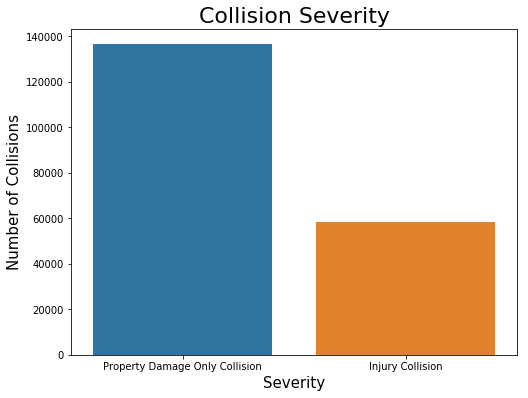

In [13]:
bar_plot(df['SEVERITYDESC'], 'Severity', 'Number of Collisions', 'Collision Severity', size=(8,6))

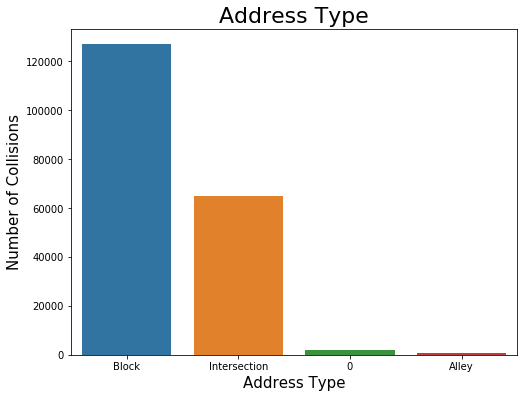

In [17]:
bar_plot(df['ADDRTYPE'], 'Address Type', 'Number of Collisions', 'Address Type', size=(8,6))

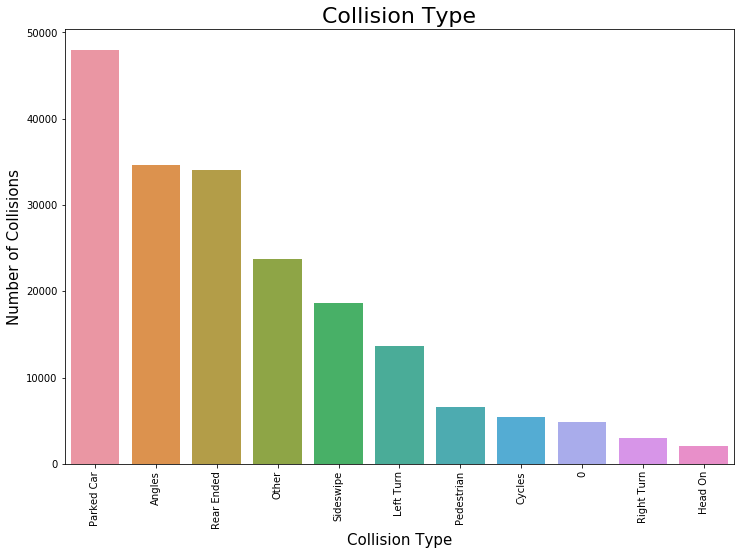

In [20]:
bar_plot(df['COLLISIONTYPE'], 'Collision Type', 'Number of Collisions', 'Collision Type', rotate=90)

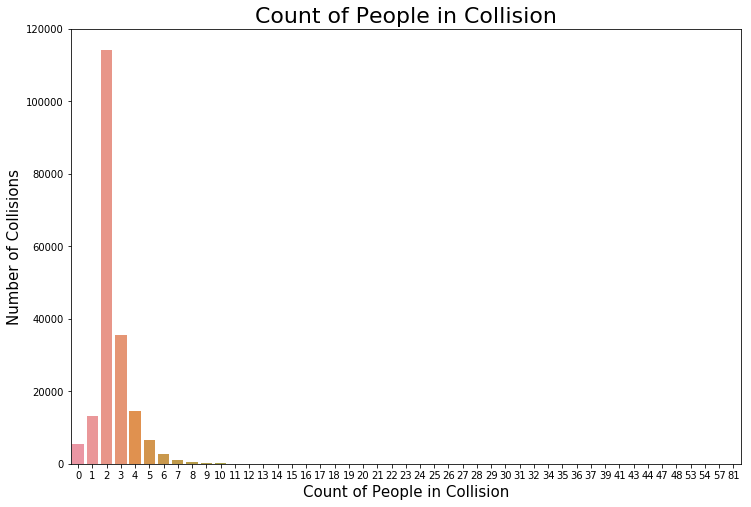

As seen two or three people were most likely to be invovled


In [23]:

bar_plot(df['PERSONCOUNT'], 'Count of People in Collision', 'Number of Collisions', 'Count of People in Collision')
print('As seen two or three people were most likely to be invovled')

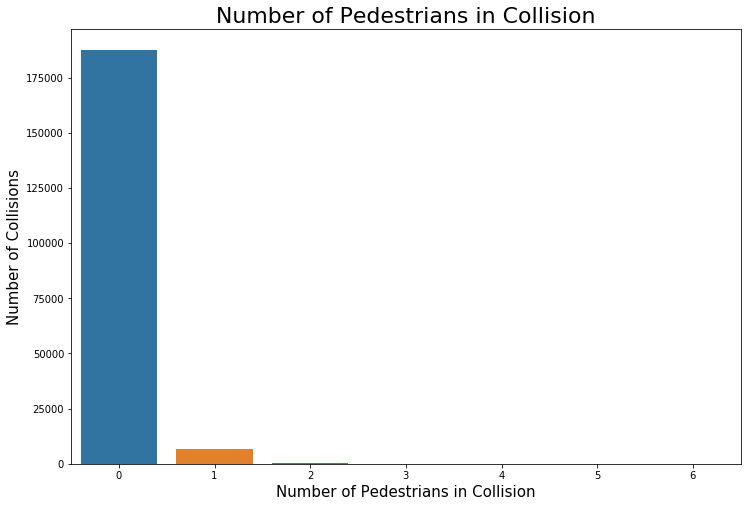

In [24]:
bar_plot(df['PEDCOUNT'], 'Number of Pedestrians in Collision', 'Number of Collisions', 'Number of Pedestrians in Collision')

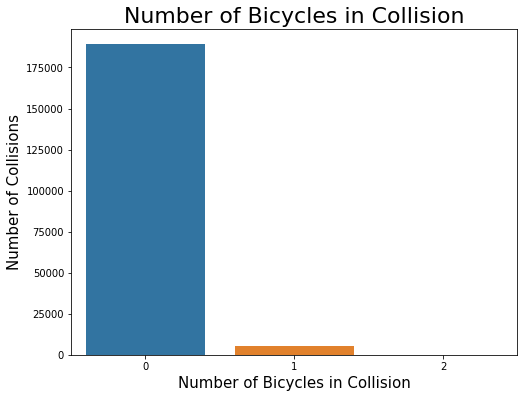

In [25]:
bar_plot(df['PEDCYLCOUNT'], 'Number of Bicycles in Collision', 'Number of Collisions', 'Number of Bicycles in Collision', size=(8,6))

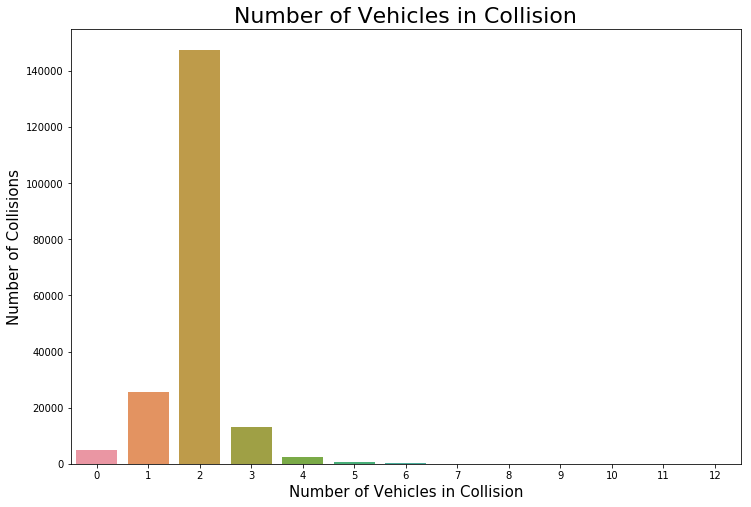

In [26]:
bar_plot(df['VEHCOUNT'], 'Number of Vehicles in Collision', 'Number of Collisions', 'Number of Vehicles in Collision')

In [27]:
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'], infer_datetime_format=True)
df['Year'] = df['INCDTTM'].dt.year
df['Month'] = df['INCDTTM'].dt.month
df['Day'] = df['INCDTTM'].dt.weekday

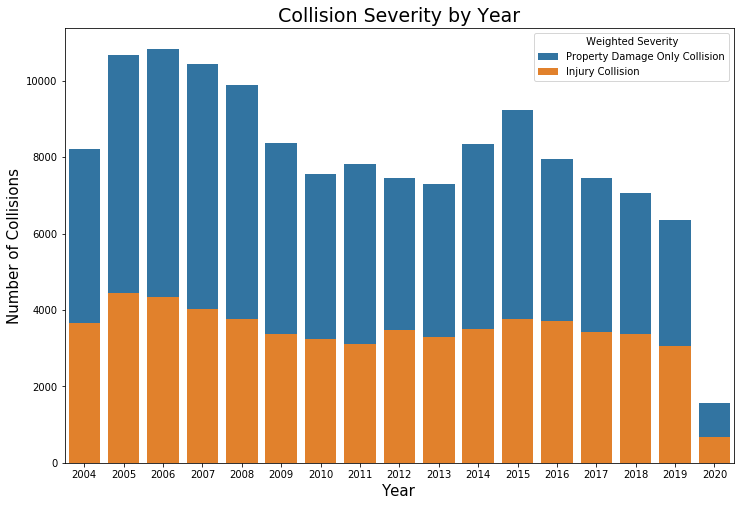

In [30]:

plt.figure(figsize=(12,8))
ax = sns.countplot(x='Year', hue='SEVERITYDESC', data=df,
                   hue_order=['Property Damage Only Collision', 'Injury Collision'], dodge=False)
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Number of Collisions', fontsize=15)
ax.set_title('Collision Severity by Year', fontsize=19)
ax.legend(title=' Weighted Severity ');

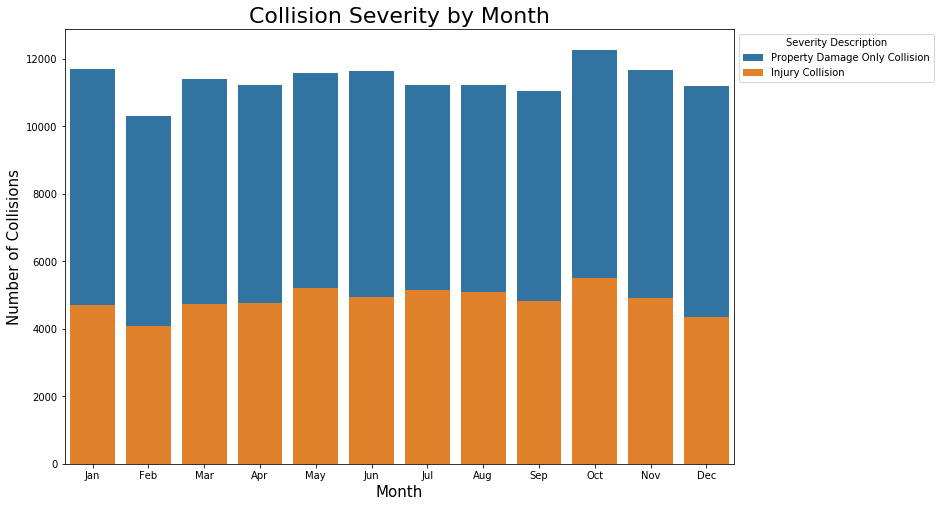

In [31]:

months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.figure(figsize=(12,8))
ax = sns.countplot(x='Month', hue='SEVERITYDESC', data=df,
                   hue_order=['Property Damage Only Collision', 'Injury Collision'], dodge=False)
ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('Number of Collisions', fontsize=15)
ax.set_title('Collision Severity by Month', fontsize=22)
ax.set_xticklabels(months)
ax.legend(title='Severity Description', bbox_to_anchor=(1,1));

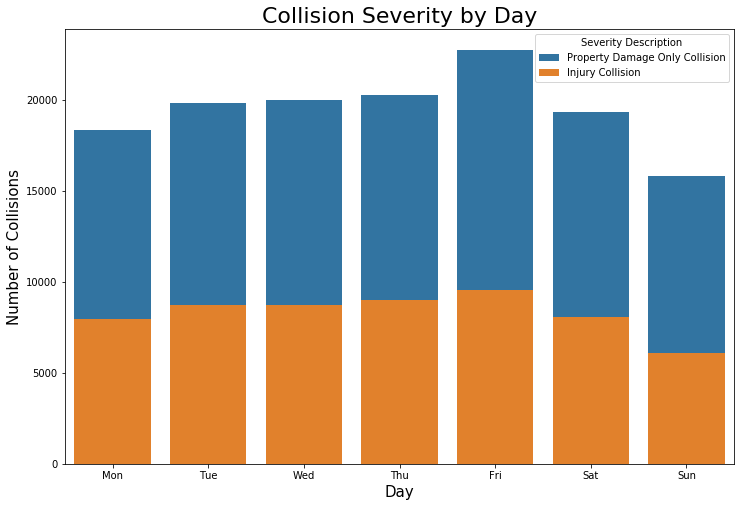

In [32]:

days=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
plt.figure(figsize=(12,8))
ax = sns.countplot(x='Day', hue='SEVERITYDESC', data=df,
                   hue_order=['Property Damage Only Collision', 'Injury Collision'], dodge=False)
ax.set_xlabel('Day', fontsize=15)
ax.set_ylabel('Number of Collisions', fontsize=15)
ax.set_title('Collision Severity by Day', fontsize=22)
ax.set_xticklabels(days)
ax.legend(title='Severity Description');

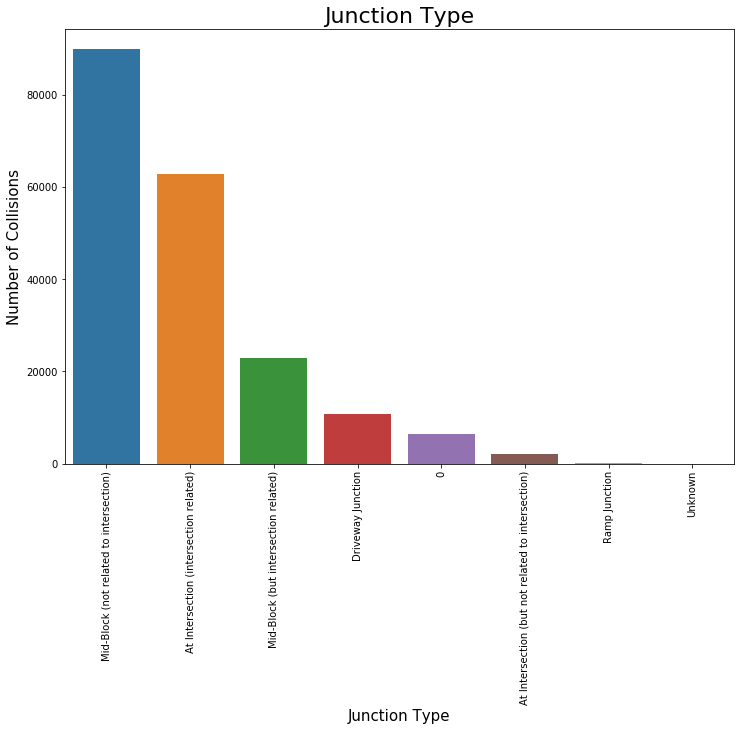

In [33]:

bar_plot(df['JUNCTIONTYPE'], 'Junction Type', 'Number of Collisions', 'Junction Type', rotate=90)

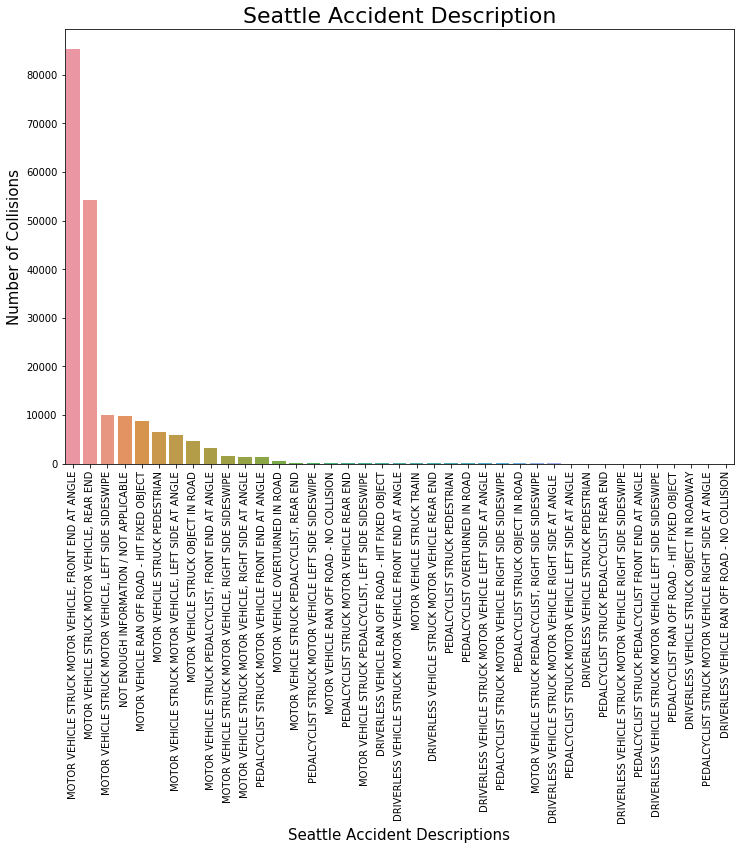

In [34]:
bar_plot(df['SDOT_COLDESC'], 'Seattle Accident Descriptions', 'Number of Collisions', 'Seattle Accident Description', rotate=90)

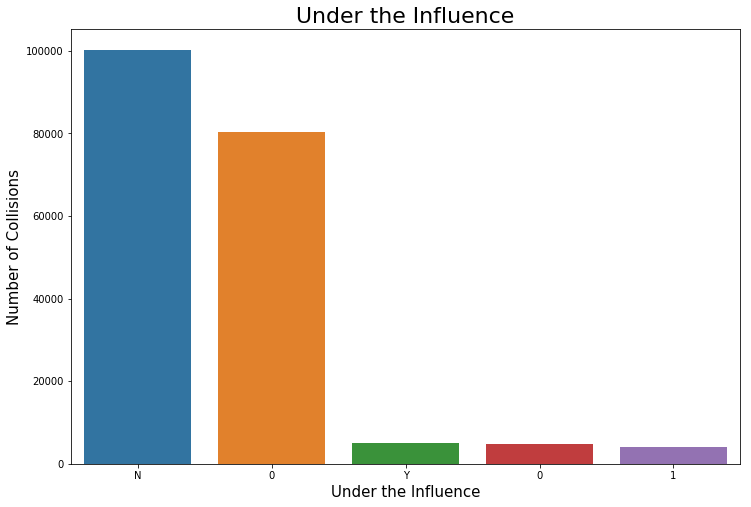

In [35]:

bar_plot(df['UNDERINFL'], 'Under the Influence', 'Number of Collisions', 'Under the Influence')

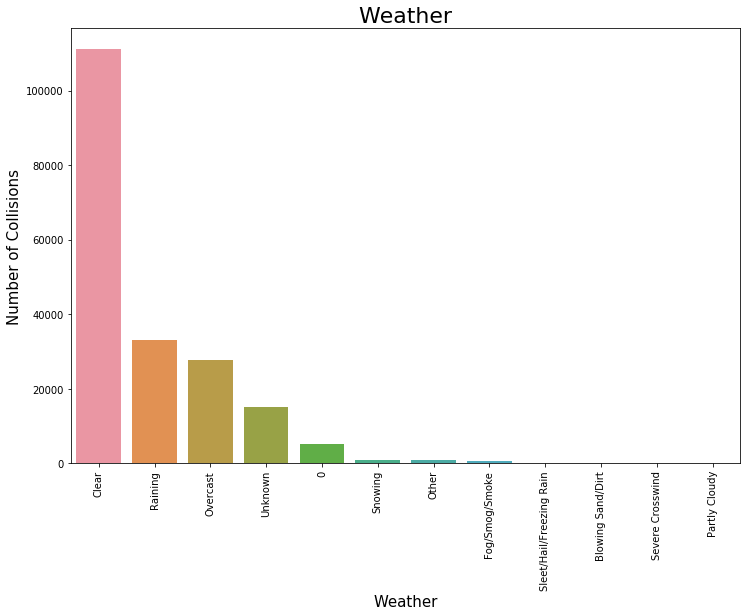

In [36]:
bar_plot(df['WEATHER'], 'Weather', 'Number of Collisions', 'Weather', rotate=90)

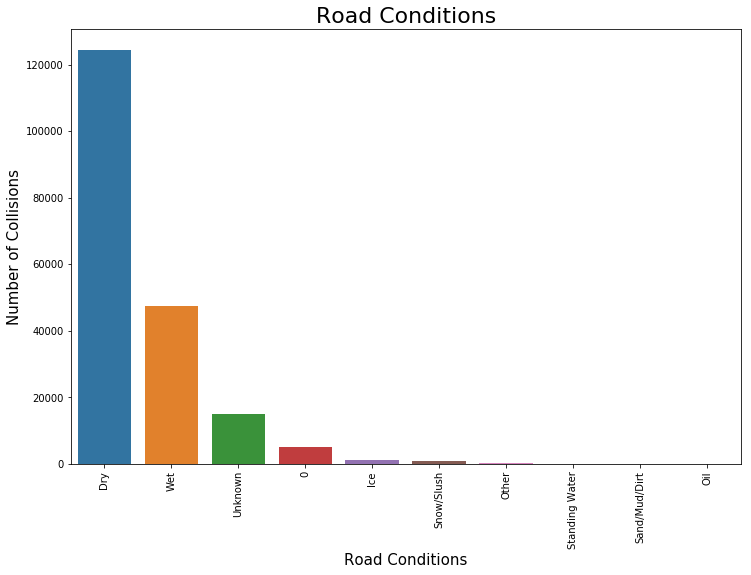

In [37]:
bar_plot(df['ROADCOND'], 'Road Conditions', 'Number of Collisions', 'Road Conditions', rotate=90)

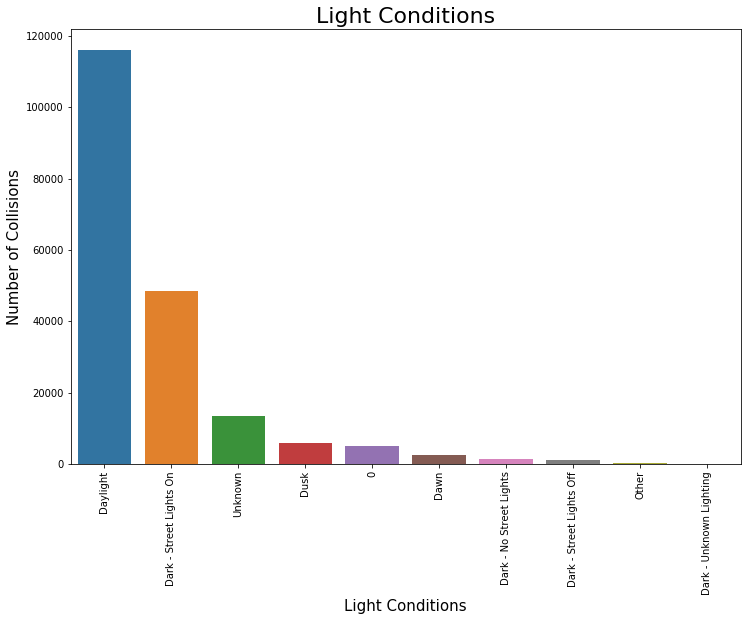

In [38]:
bar_plot(df['LIGHTCOND'], 'Light Conditions', 'Number of Collisions', 'Light Conditions', rotate=90)

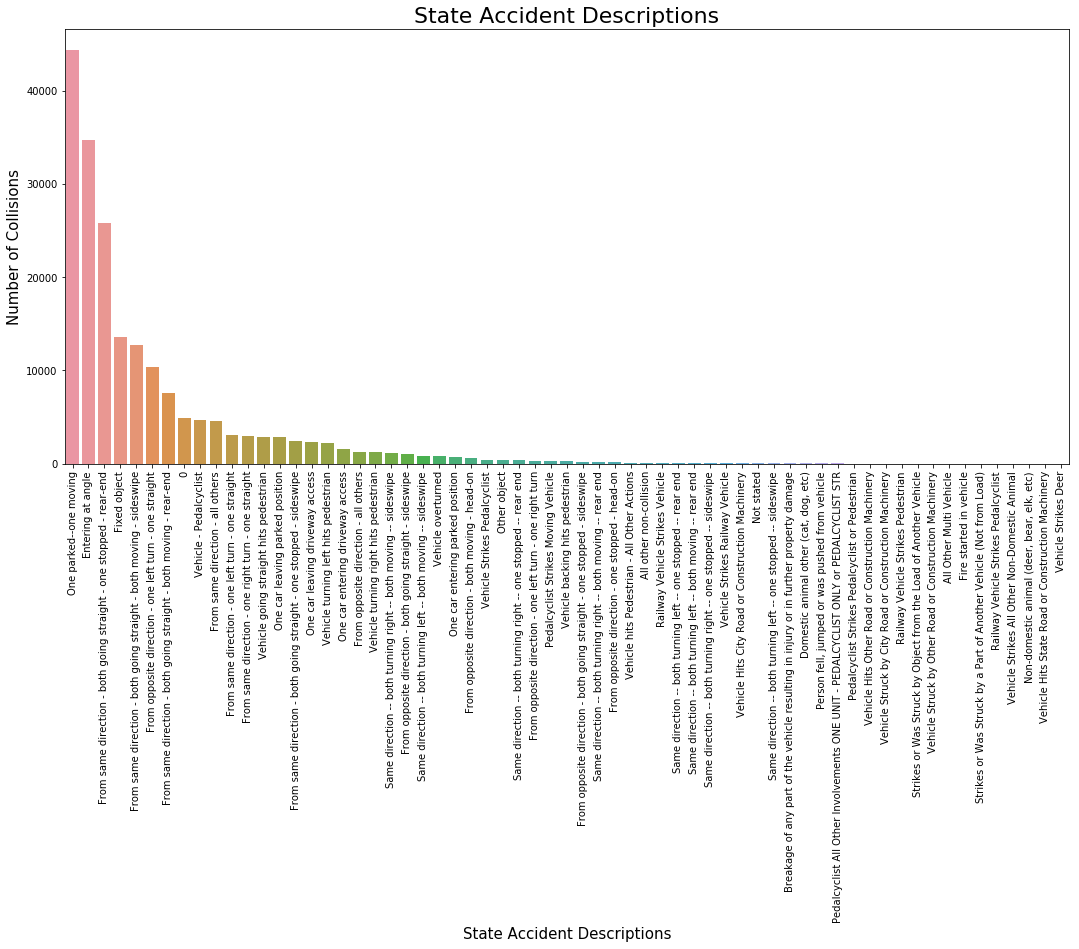

In [39]:

bar_plot(df['ST_COLDESC'], 'State Accident Descriptions', 'Number of Collisions', 'State Accident Descriptions', size=(18,8), rotate=90)

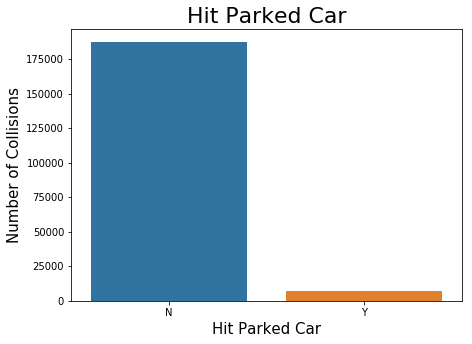

In [40]:

bar_plot(df['HITPARKEDCAR'], 'Hit Parked Car', 'Number of Collisions', 'Hit Parked Car', size=(7,5))

# Data observations:
1.	More Injuries Involving Prop. Damage Vs Injury
2.	Collisions Happened In Or Near Downtown And Hwy
3.	Collisions Without Injury Are Well Distributed 
4.	Most Common Persons Involved Is 2 
5.	Rare For Pedestrians To Be Involved
6.	More Collisions Happen On Friday , Least On Sunday
7.	More Collisions In October And Less In Dec
8.	Clear Weather Was Occurrences Of More Collisions With Rain Being The Second Highest
9.	Speeding Accounted For Main Reason For Collisions, along with carelessness and infrastructure
#### Speeding, Weather, Road And Light Conditions are good features to predict collison severity.
